<a href="https://colab.research.google.com/github/CypherTyphoon/Machine-KI_Learning/blob/main/Tag_08_Donnerstag_11042024_ProjektTag1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laden der Daten + Ausgabe der ersten paar Zeilen**

In [ ]:
#Laden des Datensatzes und Anzeigen der ersten 5 Reihen
import pandas as pd

titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Überprüfung auf fehlende Werte und Standardisierung**

In [ ]:
# Berechnung der fehlenden Werte
missing_data = titanic_data.isna().sum()

# Gesamtanzahl der Einträge
total_entries = len(titanic_data)

# Erstellen eines neuen DataFrame mit den Informationen über fehlende Daten
missing_info = pd.DataFrame({
    'Spalte': missing_data.index,
    'Fehlende Werte': missing_data.values,
    'Gesamt': [total_entries] * len(missing_data)
})

# Formatieren des DataFrame in einen String ohne Index-Spalte
formatted_missing_info = missing_info.to_string(index=False)

# Drucken der formatierten Liste
print(formatted_missing_info)

     Spalte  Fehlende Werte  Gesamt
PassengerId               0     891
   Survived               0     891
     Pclass               0     891
       Name               0     891
        Sex               0     891
        Age             177     891
      SibSp               0     891
      Parch               0     891
     Ticket               0     891
       Fare               0     891
      Cabin             687     891
   Embarked               2     891


In [ ]:
#Standardisierung
from sklearn.preprocessing import StandardScaler

# Identifizierte numerischen Spalten: Age, Fare, Sibsp, Parch
# Hier ein fiktives Beispiel für numerische Spalten:
Wert_1 = 'Age'
Wert_2 = 'Fare'
Wert_3 = 'SibSp'
Wert_4 = 'Parch'

numerische_spalten = [Wert_1, Wert_2, Wert_3, Wert_4]

# Initialisieren des StandardScaler
scaler = StandardScaler()

# Skalieren der numerischen Merkmale
titanic_data[numerische_spalten] = scaler.fit_transform(titanic_data[numerische_spalten])

# Überprüfung der ersten paar Zeilen, um die Transformation zu sehen
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,0.432793,-0.473674,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,0.432793,-0.473674,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,-0.474545,-0.473674,373450,-0.486337,NaN,S


**Behandlung fehlender Werte?**

Age, Cabin und Embarked weisen "Fehler" auf.

**Age**

In [ ]:
#Umgang mit fehlenden Werten

# Berechnen des Durchschnitts
mean_age = titanic_data['Age'].mean()

# Ersetzen der fehlenden Werte in 'Age' mit dem Durchschnitt
titanic_data['Age'].fillna(mean_age, inplace=True)

In [ ]:
# Alternative: Berechnen des Medians
median_age = titanic_data['Age'].median()

# Alternative: Ersetzen der fehlenden Werte in 'Age' mit dem Median
titanic_data['Age'].fillna(median_age, inplace=True)

In [ ]:
# Überprüfung ob es noch fehlende Werte in 'Age' gibt
print(titanic_data['Age'].isnull().sum())

**Alternative Behandlung für Age mittels gruppierter Imputation**

In [ ]:
# Age (gruppierte Imputation)

# Berechnen des Medians des Alters innerhalb jeder Gruppe
grouped_medians = titanic_data.groupby(['Pclass', 'Sex'])['Age'].median().reset_index(name='Median_Age')
print(grouped_medians)

In [ ]:
# Verwendung von 'apply'
def fill_age(row):
    condition = (
        (grouped_medians['Pclass'] == row['Pclass']) &
        (grouped_medians['Sex'] == row['Sex'])
    )
    return grouped_medians[condition]['Median_Age'].values[0]

# Nur für Zeilen, in denen Age NaN ist, füllen
titanic_data['Age'] = titanic_data.apply(lambda row: fill_age(row) if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
# Überprüfung ob es noch fehlende Werte in 'Age' gibt
print(titanic_data['Age'].isnull().sum())

0


**Cabin**

In [ ]:
# Ersetzen aller NaN-Werte in 'Cabin' durch 'U' für Unbekannt
titanic_data['Cabin'].fillna('U', inplace=True)

In [ ]:
# Überprüfen, ob es noch NaN-Werte gibt
print(titanic_data['Cabin'].isnull().sum())

0


In [ ]:
# Zählen, wie oft jeder Wert in 'Cabin' vorkommt
print(titanic_data['Cabin'].value_counts())

Cabin
U              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64


**Alternative Behandlung von Cabin mittels Basis von Pclass**

In [ ]:
# Erkunden der Datenlage
print(titanic_data.groupby('Pclass')['Cabin'].unique())

Pclass
1    [C85, C123, E46, C103, A6, C23 C25 C27, nan, B...
2                [nan, D56, F33, E101, F2, F4, D, E77]
3       [nan, G6, F G73, F E69, E10, F G63, E121, F38]
Name: Cabin, dtype: object


In [ ]:
# Fehlende Werte mit einem Platzhalter basierend auf Pclass ersetzen
titanic_data['Cabin'] = titanic_data.apply(lambda row: 'U' + str(row['Pclass']) if pd.isnull(row['Cabin']) else row['Cabin'], axis=1)

In [ ]:
# Überprüfen, ob noch fehlende Werte vorhanden sind
print(titanic_data['Cabin'].isnull().sum())

# Die ersten paar Zeilen anzeigen, um die Änderungen zu sehen
print(titanic_data[['Pclass', 'Cabin']].head())

In [ ]:
# Verteilung der Cabin-Werte analysieren
print(titanic_data['Cabin'].value_counts())

Cabin
U              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64


**Embarked**

In [ ]:
# Bestimmung des Modus
embarked_mode = titanic_data['Embarked'].mode()[0]
print(f"Modus von Embarked: {embarked_mode}")

Modus von Embarked: S


In [ ]:
# Auffüllen der fehlenden Werte mit dem Modus
titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

In [ ]:
# Überprüfen, ob noch fehlende Werte vorhanden sind
print(titanic_data['Embarked'].isnull().sum())

0


**Umwandlung von den kategorischen Daten**

Kategorische Variablen: Sex, Embarked und Pclass

mögliche Betrachtungen: Pclass (als ordinal) / (als numerischer Wert)

**"One-Hot-Encoding für 'Sex' und 'Embarked'**

In [ ]:
# One-Hot-Encoding für die Variable 'Sex' durchführen
encoded_sex = pd.get_dummies(titanic_data['Sex'])

# Den ursprünglichen Datensatz um die neuen One-Hot-kodierten Spalten erweitern
titanic_data = pd.concat([titanic_data, encoded_sex], axis=1)

# Die ursprüngliche 'Sex'-Spalte aus dem DataFrame entfernen, da sie jetzt kodiert ist
titanic_data.drop('Sex', axis=1, inplace=True)

In [ ]:
# Überprüfen der Änderung
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.530377  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.571831  0.432793   
2                             Heikkinen, Miss. Laina -0.254825 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.365167  0.432793   
4                           Allen, Mr. William Henry  0.365167 -0.474545   

      Parch            Ticket      Fare Cabin Embarked  female   male  
0 -0.473674         A/5 21171 -0.502445     U        S   False   True  
1 -0.473674          PC 17599  0.786845   C85        C    True  False  
2 -0.473674  STON/O2. 3101282 -0.488854     U        S    True  False  
3 -0.473674            113803  0.42073

In [ ]:
# One-Hot-Encoding für die Variable 'Embarked' durchführen
encoded_embarked = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')

# Den ursprünglichen Datensatz um die neuen One-Hot-kodierten Spalten erweitern
titanic_data = pd.concat([titanic_data, encoded_embarked], axis=1)

# Die ursprüngliche 'Embarked'-Spalte aus dem DataFrame entfernen, da sie jetzt kodiert ist
titanic_data.drop('Embarked', axis=1, inplace=True)

In [ ]:
# Überprüfen der Änderung
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.530377  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.571831  0.432793   
2                             Heikkinen, Miss. Laina -0.254825 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.365167  0.432793   
4                           Allen, Mr. William Henry  0.365167 -0.474545   

      Parch            Ticket      Fare Cabin  female   male  Embarked_C  \
0 -0.473674         A/5 21171 -0.502445     U   False   True       False   
1 -0.473674          PC 17599  0.786845   C85    True  False        True   
2 -0.473674  STON/O2. 3101282 -0.488854     U    True  False       False   
3 -0.473674           

**Pclass**

In [ ]:
# Überprüfen der einzigartigen Werte von Pclass
print(titanic_data['Pclass'].unique())

[3 1 2]


Anmerkung: da Pclass numerischer Natur ist, wird dieser Wert wie er ist für spätere Modellierung genutzt.

**Feature Engineering**

In [ ]:
# Berechnen der Familiengröße
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

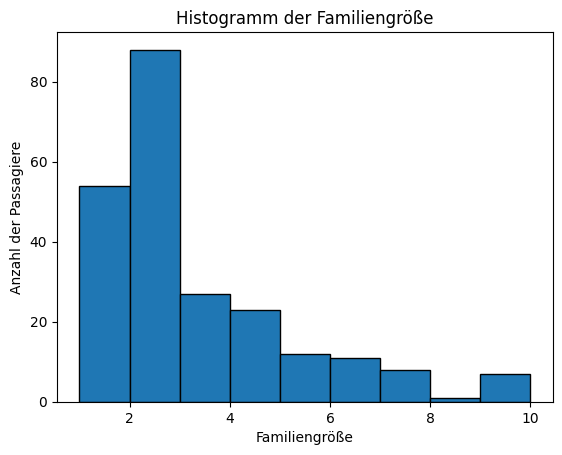

In [ ]:
#Visualisierung der Familiengröße
import matplotlib.pyplot as plt
import numpy as np
import math

# Runden Sie den maximalen Wert von FamilySize auf die nächste ganze Zahl auf
max_family_size = math.ceil(titanic_data['FamilySize'].max())

# Histogramm der Familiengröße
plt.hist(titanic_data['FamilySize'], bins=range(1, max_family_size + 1), edgecolor='black')
plt.xlabel('Familiengröße')
plt.ylabel('Anzahl der Passagiere')
plt.title('Histogramm der Familiengröße')
plt.show()

**Titel**

In [ ]:
# Extrahieren des Titels aus den Namen
import re

# Extrahieren des Titels aus den Namen
titanic_data['Title'] = titanic_data['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

In [ ]:
# Überprüfen der extrahierten Titel
print(titanic_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


Kodieren der extrahierten Titel als kategoriale Variablen

In [ ]:
# Kodieren der extrahierten Titel als kategoriale Variablen
encoded_title = pd.get_dummies(titanic_data['Title'])

# Den ursprünglichen Datensatz um die neuen One-Hot-kodierten Spalten erweitern
titanic_data = pd.concat([titanic_data, encoded_title], axis=1)

In [ ]:
# Überprüfen der Änderung
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.530377  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.571831  0.432793   
2                             Heikkinen, Miss. Laina -0.254825 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.365167  0.432793   
4                           Allen, Mr. William Henry  0.365167 -0.474545   

      Parch            Ticket      Fare Cabin  ...  Major  Master   Miss  \
0 -0.473674         A/5 21171 -0.502445     U  ...  False   False  False   
1 -0.473674          PC 17599  0.786845   C85  ...  False   False  False   
2 -0.473674  STON/O2. 3101282 -0.488854     U  ...  False   False   True   
3 -0.473674           

**Kabinendeck**

In [ ]:
# Extrahieren des Kabinendecks aus Cabin
import re

# Extrahieren des Kabinendecks aus den Kabinen
titanic_data['Deck'] = titanic_data['Cabin'].apply(lambda x: re.search(r'([A-Za-z])', str(x)).group(1) if pd.notnull(x) else 'Unknown')

In [ ]:
# Überprüfen der extrahieren Kabinendecks
print(titanic_data['Deck'].value_counts())

Deck
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


Kodieren der extrahierten Kabinendecks als kategoriale Variablen

In [ ]:
# Kodieren der extrahierten Kabinendecks als kategoriale Variablen
encoded_deck = pd.get_dummies(titanic_data['Deck'], prefix='Deck')

# Den ursprünglichen Datensatz um die neuen One-Hot-kodierten Spalten erweitern
titanic_data = pd.concat([titanic_data, encoded_deck], axis=1)

In [ ]:
# Überprüfen der Änderung
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.530377  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.571831  0.432793   
2                             Heikkinen, Miss. Laina -0.254825 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.365167  0.432793   
4                           Allen, Mr. William Henry  0.365167 -0.474545   

      Parch            Ticket      Fare Cabin  ...  Deck  Deck_A  Deck_B  \
0 -0.473674         A/5 21171 -0.502445     U  ...     U   False   False   
1 -0.473674          PC 17599  0.786845   C85  ...     C   False   False   
2 -0.473674  STON/O2. 3101282 -0.488854     U  ...     U   False   False   
3 -0.473674           

**Auswahl des Modells und folgende Schritt**

Mögliche Modelle:
Random Forest, Gradient Boosting (neue Erfahrungen möglich)

für das Projekt geeignet, aber nicht Frage kommend (keine neuen Erfahrungen)
Logistische Regression, Entscheidungsbäume

**Random Forest**

In [ ]:
# Festlegen der Zielvariable (Y)
y = titanic_data['Survived']

# Festlegen der Features (X)
X = titanic_data.drop('Survived', axis=1)


In [ ]:
print(X.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


In [ ]:
X = X.reset_index(drop=True)

In [ ]:
# Entfernen Sie die Spalte "Name" aus den Features
X = X.drop("Name", axis=1)

KeyError: "['Name'] not found in axis"

In [ ]:
# Alternativ können Sie die Spalte "Name" in numerische Werte umwandeln
# Beispielsweise können Sie die Länge des Namens als Feature verwenden
X['Name_Length'] = X['Name'].apply(len)
X = X.drop("Name", axis=1)

In [ ]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,3,-0.530377,0.432793,-0.473674,-0.502445,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,1,0.571831,0.432793,-0.473674,0.786845,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,3,3,-0.254825,-0.474545,-0.473674,-0.488854,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,1,0.365167,0.432793,-0.473674,0.420730,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,5,3,0.365167,-0.474545,-0.473674,-0.486337,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
X = pd.get_dummies(X, columns=['Title'])

In [ ]:
# Durchführung von Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des Random Forest Klassifikators
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training des Modells
rf_classifier.fit(X_train, y_train)

# Vorhersage auf dem Testdatensatz
y_pred = rf_classifier.predict(X_test)

# Auswertung der Vorhersage
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Random Forest Modells:", accuracy)

# Weitere Metriken
print(classification_report(y_test, y_pred))

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des Gradient Boosting Klassifikators
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training des Modells
gb_classifier.fit(X_train, y_train)

# Vorhersage auf dem Testdatensatz
y_pred = gb_classifier.predict(X_test)

# Auswertung der Vorhersage
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit des Gradient Boosting Modells:", accuracy)

# Weitere Metriken
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'STON/O 2. 3101293'

**Feinabstimmung und Cross-Validation**

In [ ]:
# Grid-Search zur Feinabstimmung der Hyperparameter
from sklearn.model_selection import GridSearchCV

# Definieren Sie den Parameter-Raster für die Feinabstimmung
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisierung des Random Forest Klassifikators
rf_classifier = RandomForestClassifier(random_state=42)

# Initialisierung des Grid Search Objekts
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Ausführung des Grid Search
grid_search.fit(X_train, y_train)

# Ausgabe der besten Hyperparameter-Kombination
print("Beste Hyperparameter-Kombination gefunden:")
print(grid_search.best_params_)

In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

# Initialisierung des Random Forest Klassifikators mit den besten Hyperparametern aus dem Grid Search
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Durchführung von k-Fold Cross-Validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Ausgabe der durchschnittlichen Genauigkeit über alle Folds
print("Durchschnittliche Genauigkeit über alle Folds:", cv_scores.mean())

**Modellinterpretation und -evaluation**

In [ ]:
# Wichtigste Merkmale ausgeben
feature_importance = best_rf_classifier.feature_importances_
print("Wichtigste Merkmale:")
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {feature_importance[i]}")

In [ ]:
# Modellleistung bewerten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Vorhersagen auf dem Testdatensatz
y_pred = best_rf_classifier.predict(X_test)

# Auswertung der Vorhersagen
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Genauigkeit:", accuracy)
print("Präzision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

In [ ]:
# Modellfehleranalyse
errors = X_test[y_test != y_pred]
print("Beispiele für falsche Vorhersagen:")
print(errors.head())